In [1]:
%matplotlib inline
import numpy as np
import nbodykit.lab as nb

In [2]:
nbar = {}
nbar['standard'] = np.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_knownsystot_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)
nbar['lin (known)'] = np.load('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/nnbar/nnbar_NGC_known_mainlinmse_512_v7_2_main_512.npy', allow_pickle=True)
nbar['NN (known)'] = np.load('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/nnbar/nnbar_NGC_known_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)

nbar['lin (known+gaia)'] = np.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_known_mainlinstar_512_v7_2_main_512.npy', allow_pickle=True)
nbar['NN (known+gaia)'] = np.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_known_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)

In [3]:
import matplotlib.pyplot as plt

In [4]:
from eboss_figs import setup_color

In [5]:
setup_color()

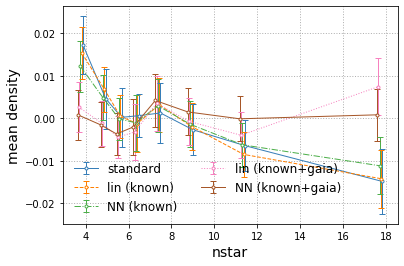

In [6]:
# plt.figure(figsize=(12, 7))

for i, (ni,vi) in enumerate(nbar.items()):
    
    plt.errorbar(vi[0]['bin_avg']+0.3+(i+1)*(-0.06), vi[0]['nnbar']-1, vi[0]['nnbar_err'], 
                 label=ni, capsize=3, mfc='w', marker='.', lw=1)
    
plt.legend(ncol=2, fontsize=12, loc='lower left', frameon=False)    
plt.xlabel('nstar', fontsize=14)
plt.grid(ls=':', lw=1)
plt.ylabel('mean density', fontsize=14)
plt.savefig('nbar_linstar.png', dpi=300, bbox_inches='tight')

In [8]:
def load(filename):
    d_ = nb.ConvolvedFFTPower.load(filename)
    return (d_.poles['k'], d_.poles['power_0']-d_.attrs['shotnoise'])

pks = {}
pks['standard'] = load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_knownsystot_mainhighz_512_v7_2_main.json')
pks['lin (known)'] = load('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/spectra/spectra_NGC_known_mainlinmse_512_v7_2_main.json')
pks['NN (known)'] = load('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/spectra/spectra_NGC_known_mainhighz_512_v7_2_main.json')
pks['lin (known+gaia)'] = load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_known_mainlinstar_512_v7_2_main.json')
pks['NN (known+gaia)'] = load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_known_mainhighz_512_v7_2_main.json')

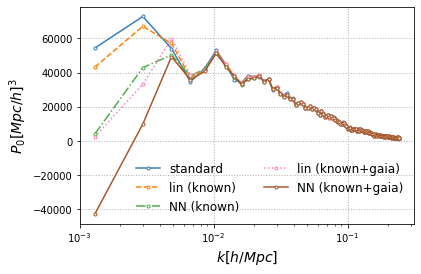

In [10]:
# plt.figure(figsize=(12, 7))
for i, (ni,vi) in enumerate(pks.items()):
    plt.plot(vi[0], vi[1].real, label=ni, marker='.', mfc='w')
    
plt.xscale('log')    
plt.legend(ncol=2, fontsize=12, loc='lower right', frameon=False)    
plt.xlabel('$k [h/Mpc]$', fontsize=14)
plt.grid(ls=':', lw=1)
plt.ylabel(r'$P_{0} [Mpc/h]^3$', fontsize=14)
plt.savefig('p0_linstar.png', dpi=300, bbox_inches='tight')